
# TP Clustering
### Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr 

SI4 2022-23

In [1]:
#import the necessary libraries
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt

# Experiments on synthetic data
In this section, everything is almost already done: read carefully the codes, observe the results, play with parameters. It is very important that you understand everything in this part.

## Generating blobs

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_samples = 1500
random_state = 160
#random_state is the seed for the random generation and let you reproduce the exact same dataset
X, y = make_blobs(centers=3, n_samples=n_samples, random_state=random_state)


### Drawing the data

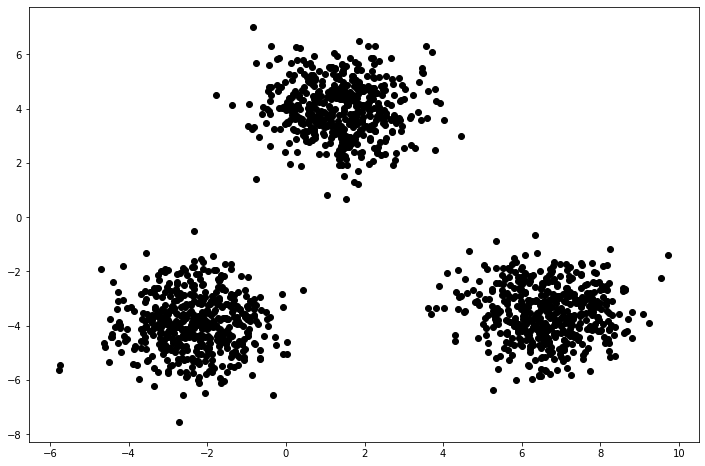

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='k')
plt.show()

## Clustering method: k-means
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html !

In [5]:
from sklearn.cluster import KMeans

In [6]:
nbClusters = 3

### Initialisation of the centroids

Read **carefully** the next 4 cells: they present different possible construction of k-means clustering objects. Before choosing the one that you will use, understand the different parameters.

In [7]:
## basic kmean with random initialisation
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random')

In [8]:
## random initialisation but using fixed seed for reproducing the experiments
random_state2 = 150
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='random', random_state=random_state2)

In [9]:
## fixed initialisation of the centroid (no random)
c = np.array([[2,2],[1,5],[2,-4]]) #this is a bad init. try also c=np.array([[5,5],[8,2],[7,2]])
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init=c)

In [10]:
## random initialisation using heuristic 'k-means++' 
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='k-means++')
# you could also increase n_init parameter for trying different initialisation of the centroids

### Learning and prediction

In [11]:
#learning and computing the result:
y_pred = km.fit_predict(X)

### Visualisation of the clustering result.

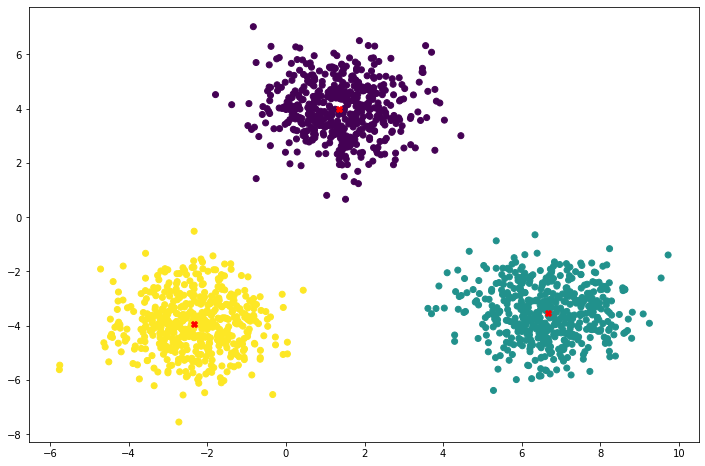

In [12]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: k-medoid
Don't hesitate to read the doc: https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html !

Vous aurez besoin d'installer sklearn-extra. *You need to install sklearn-extra*:

In [13]:
from sklearn_extra.cluster import KMedoids
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='random')

Change the init parameters to ‘k-medoids++’ or other parameters and observe the differences.

In [14]:
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='k-medoids++')
y_pred = km1.fit_predict(X)

Don't forget to visualize the results!

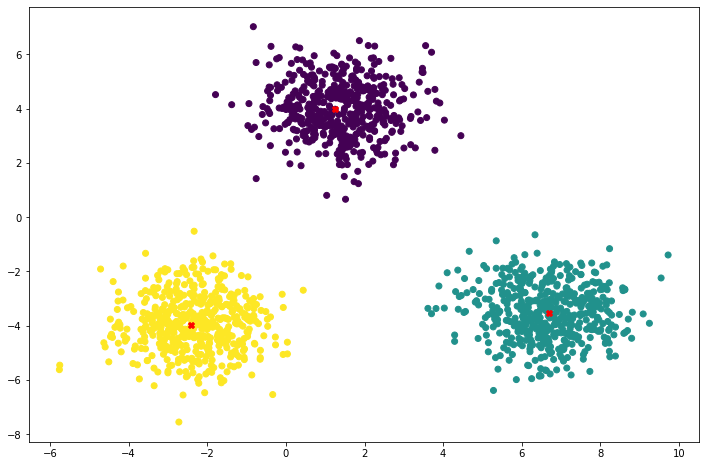

In [15]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
c=km1.cluster_centers_
#we plot centroids in red
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

## Clustering method: agglomerative clustering
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

Testing different linkage could be a good idea!

In [17]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
#play with the linkages
y_pred = ac.fit_predict(X)

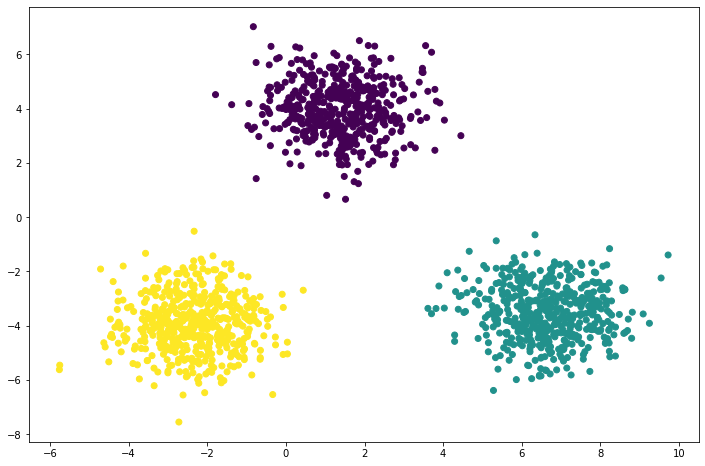

In [18]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Clustering method: DBSCAN
Don't hesitate to read the doc: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
db = DBSCAN(eps=0.3, min_samples=10)
y_pred=db.fit_predict(X)

#noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
nbClusters = max(y_pred)+1
nbNoise = list(y_pred).count(-1)

print('Number of clusters: ', nbClusters)
print('Number of noisy samples: ', nbNoise)


Number of clusters:  3
Number of noisy samples:  374


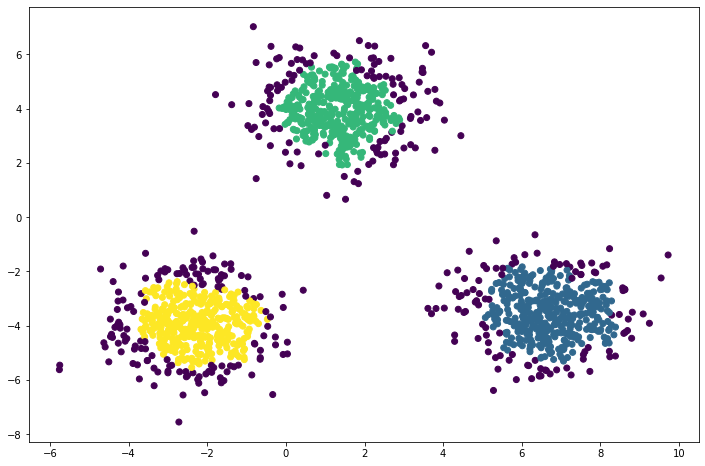

In [21]:
plt.figure(figsize=(12, 8))
#we use the predicted label (or cluster) as a color for the samples
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## Evaluation methods
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [22]:
from sklearn import metrics

In [23]:
silhouetteScore = metrics.silhouette_score(X, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.43


**Code for plotting silhouettes.** From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

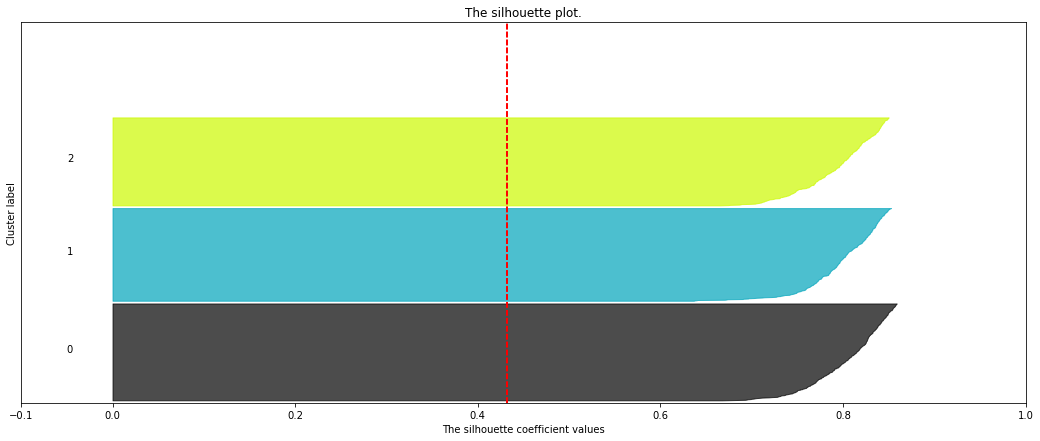

In [24]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Experiments on digit dataset
**We give you some code in this part (loading data, standardisation and visualisation) as hints but you have to test the previous clustering algorithms yourself on this digit dataset.**

In order to compare the clustering results with the original classes of the data, we will use 2 codes:
- color for the cluster number: colors = [cm.nipy_spectral(float(i) / 10) for i in range(10)]
- shape for the original class: caracters corresponding to class digit

y is the variable for the true class of each sample

ypred is the variable for the predicted cluster number of each sample (you need to use a clustering method in order to compute ypred)

X2 is the result of a dimension reduction to 2 of the data (embedded space)

**BE CAREFUL THAT THE CLUSTERING OPERATION SHOULD NOT BE DONE IN THE EMBEDDED SPACE!**

### Loading the data

In [25]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

### Data standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)


## Clustering method: k-means
Don't hesitate to read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html !

### Initialiation of the centroids

In [27]:
nbCluster = 10 #we know that there are 10 classes

km = KMeans(n_clusters=nbCluster, max_iter=10, n_init=1, init='k-means++')


### Learning and production

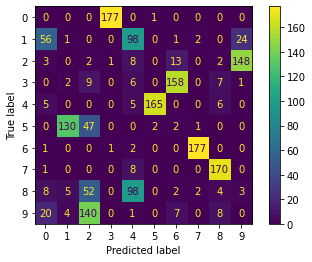

In [28]:
ypred = km.fit_predict(X)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cmatr = confusion_matrix(y, ypred)
ConfusionMatrixDisplay(cmatr, display_labels=None).plot()

Here, the confusion matrix means nothing because it's an unsupervised algo.

### Virtualisation of the clustering result

In [29]:
# colors = 10 colors
colors = cm.nipy_spectral(np.linspace(0, 1, nbCluster))
col = np.array([colors[c] for c in ypred])

In [30]:
### tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
Xtsne = tsne.fit_transform(Xscaled)



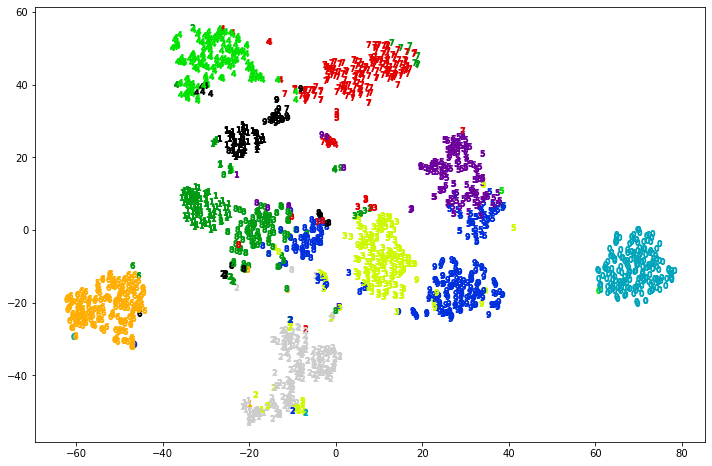

In [31]:

Xvis = Xtsne

plt.figure(figsize=(12, 8))
for i in range(0,len(Xvis)):
    plt.scatter(Xvis[i, 0], Xvis[i, 1], color=col[i], marker='$' + str(y[i]) + '$')
plt.show()

In [32]:
silhouetteScore = metrics.silhouette_score(Xscaled, ypred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.13


In [33]:
import matplotlib.cm as cm

def plot_silhouette(X, ypred, nbCluster, silhouetteScore):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (nbCluster + 1) * 10])
    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, ypred)
    y_lower = 10
    #loop over clusters
    for i in range(nbCluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[ypred == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / nbCluster)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax.set_title("The silhouette plot.")
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouetteScore, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

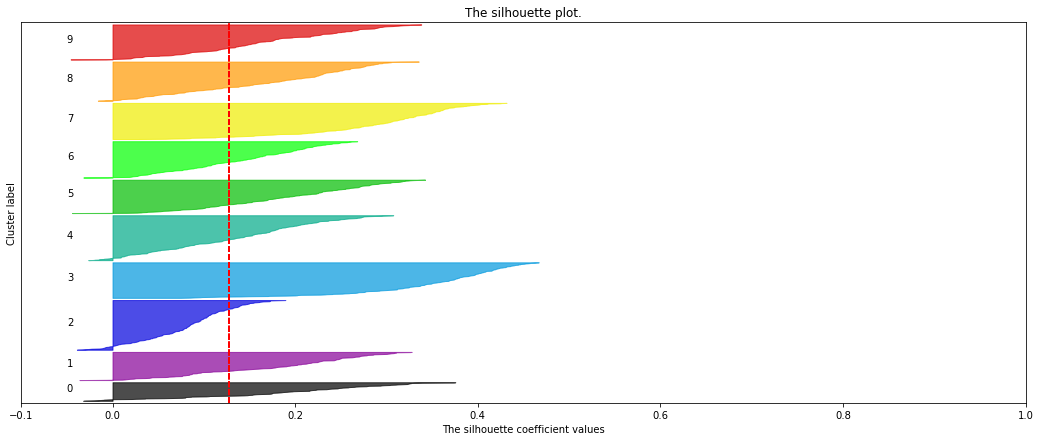

In [34]:
plot_silhouette(X, ypred, nbCluster, silhouetteScore)

## k-medoid

In [35]:
from sklearn_extra.cluster import KMedoids
nbClusters = 10
km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='random')
#km1 = KMedoids(n_clusters=nbClusters, max_iter=10, init='k-medoids++')
y_pred = km1.fit_predict(Xscaled)



In [36]:
# colors = 10 colors
colors = cm.nipy_spectral(np.linspace(0, 1, nbClusters))
col = np.array([colors[c] for c in y_pred])

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
Xtsne = tsne.fit_transform(Xscaled)

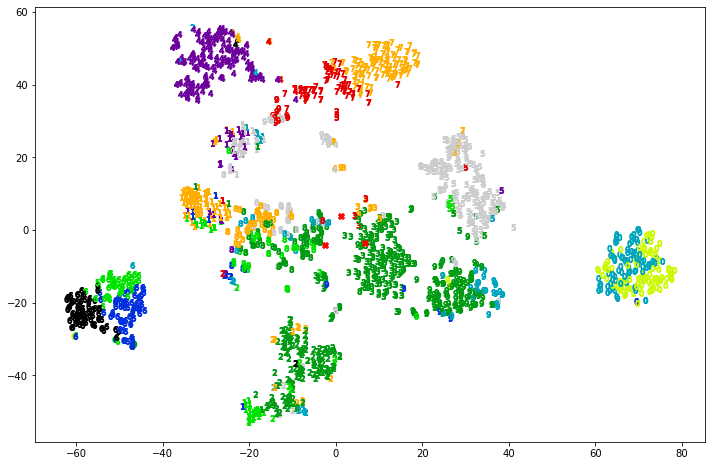

In [38]:
Xvis = Xtsne

plt.figure(figsize=(12, 8))
for i in range(0,len(Xvis)):
    plt.scatter(Xvis[i, 0], Xvis[i, 1], color=col[i], marker='$' + str(y[i]) + '$')
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

In [39]:
silhouetteScore = metrics.silhouette_score(Xscaled, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.05


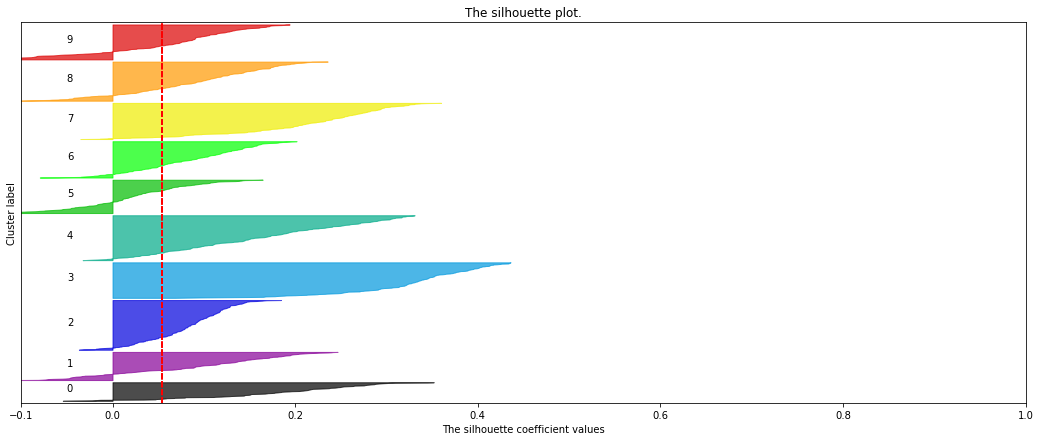

In [40]:
plot_silhouette(Xscaled, ypred, nbCluster, silhouetteScore)

## DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:

epsPossible = []
for i in np.arange(0.01, 5, 0.01):
    db = DBSCAN(eps=i, min_samples=10)
    y_pred = db.fit_predict(Xscaled)
    #silhouetteScore = metrics.silhouette_score(Xscaled, y_pred)
    if max(y_pred) + 1 == 10:
        epsPossible.append(i)

print(epsPossible)

[3.7399999999999998, 3.75, 3.76, 3.77, 3.82, 3.83, 3.84, 3.8499999999999996, 3.86, 3.92, 4.109999999999999, 4.12, 4.13, 4.31, 4.34, 4.35, 4.36, 4.37, 4.38]


In [43]:
print(epsPossible)
lowestNoise = 2000
bestEps = 0
for i in range(len(epsPossible)):
    db = DBSCAN(eps=epsPossible[i], min_samples=10)
    y_pred = db.fit_predict(Xscaled)
    if(list(y_pred).count(-1) < lowestNoise):
        lowestNoise = list(y_pred).count(-1)
        bestEps = i

print("Best Epsilon: " + str(epsPossible[bestEps]), lowestNoise)
eps = epsPossible[bestEps]

[3.7399999999999998, 3.75, 3.76, 3.77, 3.82, 3.83, 3.84, 3.8499999999999996, 3.86, 3.92, 4.109999999999999, 4.12, 4.13, 4.31, 4.34, 4.35, 4.36, 4.37, 4.38]
Best Epsilon: 4.38 758


In [44]:
db = DBSCAN(eps=eps, min_samples=10)
y_pred=db.fit_predict(Xscaled)

print(y_pred)

#noisy points will be labelled as -1: choose a special color (black ?) for those noisy points
nbClusters = max(y_pred)+1
nbNoise = list(y_pred).count(-1)

print('Number of clusters: ', nbClusters)
print('Number of noisy samples: ', nbNoise)

[ 0  1 -1 ...  1 -1 -1]
Number of clusters:  10
Number of noisy samples:  758


In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
Xtsne = tsne.fit_transform(Xscaled)

In [46]:
colors = cm.nipy_spectral(np.linspace(0, 1, nbClusters))
col = np.array([colors[c] for c in y_pred])

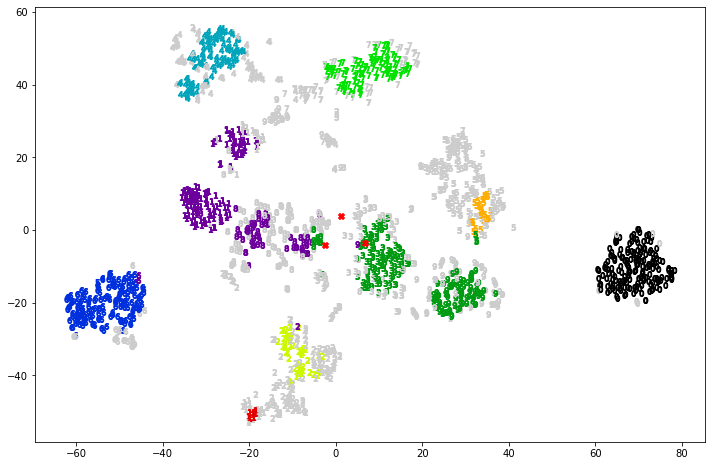

In [47]:

Xvis = Xtsne

plt.figure(figsize=(12, 8))
for i in range(0,len(Xvis)):
    plt.scatter(Xvis[i, 0], Xvis[i, 1], color=col[i], marker='$' + str(y[i]) + '$')
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

In [48]:
silhouetteScore = metrics.silhouette_score(Xscaled, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.01


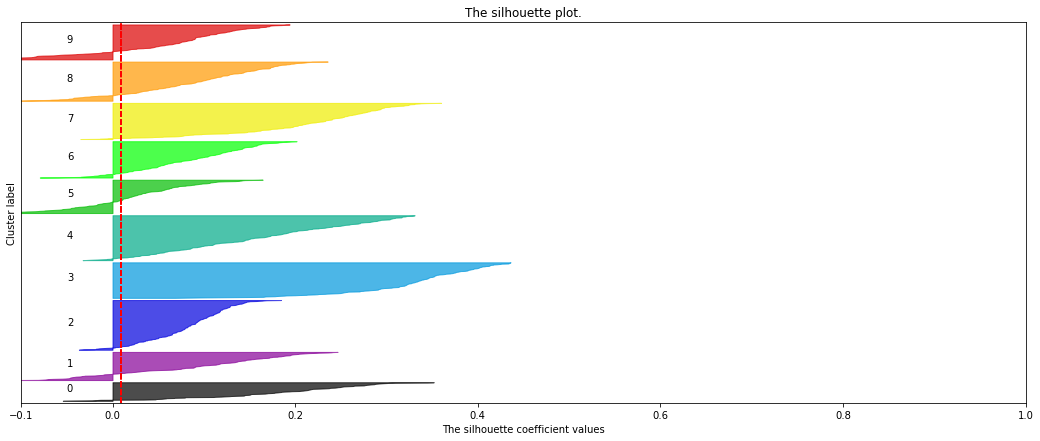

In [49]:
plot_silhouette(Xscaled, ypred, nbCluster, silhouetteScore)

## Agglomerative algorithm

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
ac = AgglomerativeClustering(n_clusters=nbCluster, affinity='euclidean',linkage='ward')
#play with the linkages
y_pred = ac.fit_predict(Xscaled)
print(y_pred)

[5 1 1 ... 1 1 1]


In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
Xtsne = tsne.fit_transform(Xscaled)

In [53]:
# colors = 10 colors
colors = cm.nipy_spectral(np.linspace(0, 1, nbClusters))
col = np.array([colors[c] for c in y_pred])

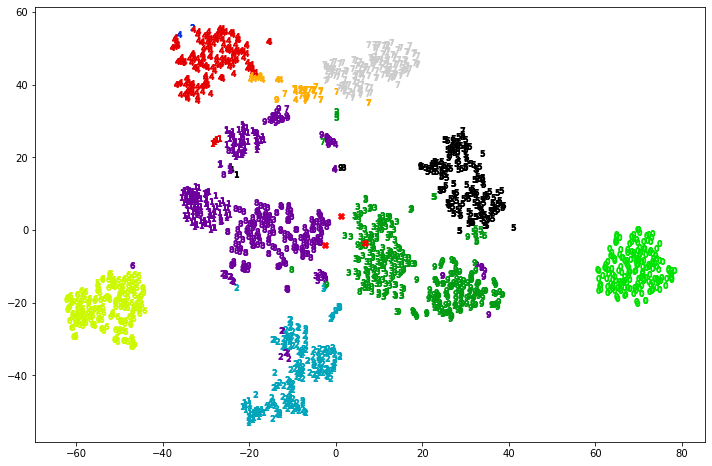

In [54]:

Xvis = Xtsne

plt.figure(figsize=(12, 8))
for i in range(0,len(Xvis)):
    plt.scatter(Xvis[i, 0], Xvis[i, 1], color=col[i], marker='$' + str(y[i]) + '$')
plt.scatter(c[:,0],c[:,1],c='r',marker="X")
plt.show()

In [55]:
silhouetteScore = metrics.silhouette_score(Xscaled, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Silhouette Coefficient: 0.13


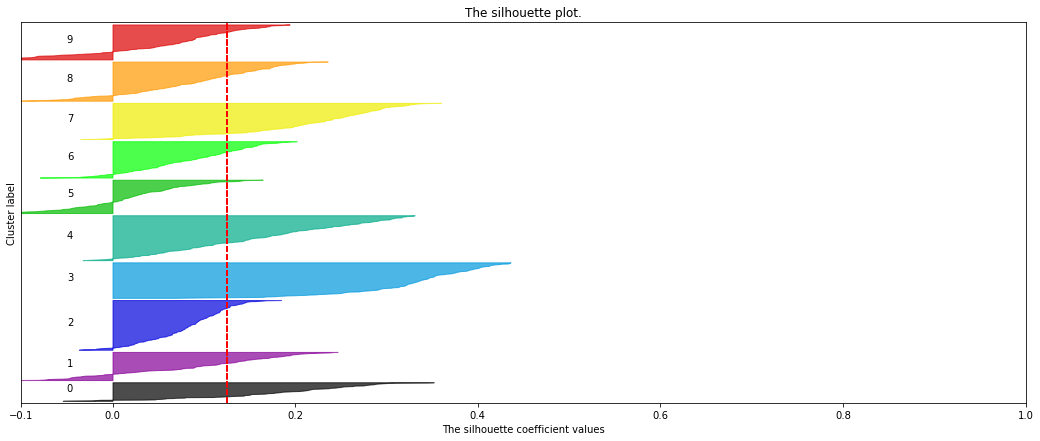

In [56]:
plot_silhouette(Xscaled, ypred, nbCluster, silhouetteScore)